# ¡Hola, Carlos!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# 1 Analisis Exploratorio de Datos

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
En este proyecto estaremos trabajando en analizar la data provista para la empresa `Zuber`, estaremos chequeando la integridad de la data, adecuandola a nuestras necesidad para el analisis, tambien haremos un analisis de la cantidad de viajes por empresa y por barrio, para sacar conclusiones en la dinamica de negocio que esta teniendo la empresa, tambien estaremos probando la hipotesis de si la frecuencia de los viajes varia con los cambios de clima, sacaremos nuestras conclusiones de estos resultados y presentaremos el proyecto como tal, con los resultados obtenidos.
</div>

## Inicializacion

In [18]:
# Cargar todas las librerías
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca cargamos todas las librerias que utilizaremos para el proyecto.
</div>

## Cargar los Datos

In [2]:
# Nombre de tus archivos CSV
file_names = [
    "/datasets/project_sql_result_01.csv",
    "/datasets/project_sql_result_04.csv",
    "/datasets/project_sql_result_07.csv"
]

# Crear un diccionario para almacenar los DataFrames
dataframes = {}

# Iterar a través de los nombres de archivo y cargar los datos en DataFrames
for file_name in file_names:
    # Usa try-except para manejar cualquier error al cargar archivos
    try:
        # Obtener el nombre base del archivo sin la extensión
        base_name = os.path.basename(file_name)
        key = os.path.splitext(base_name)[0]
        # Cargar el archivo CSV en un DataFrame y almacenarlo en el diccionario
        dataframes[key] = pd.read_csv(file_name)
        print(f"Archivo {base_name} cargado exitosamente.")
    except Exception as e:
        print(f"Error al cargar {file_name}: {str(e)}")

# Ahora puedes acceder a los DataFrames utilizando nombres de archivo sin la extensión como claves
# Por ejemplo, para acceder al DataFrame de project_sql_result_01.csv:
result_01 = dataframes['project_sql_result_01']

# Para acceder al DataFrame de project_sql_result_04.csv:
result_04 = dataframes['project_sql_result_04']

# Para acceder al DataFrame de project_sql_result_07.csv:
result_07 = dataframes['project_sql_result_07']

Archivo project_sql_result_01.csv cargado exitosamente.
Archivo project_sql_result_04.csv cargado exitosamente.
Archivo project_sql_result_07.csv cargado exitosamente.


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Como se puede apreciar, para cargar las `3` bases de datos que fueron provistas por la empresa, creamos un codigo que nos ayuda a volver los dataframes diccionarios accesibles en cualquier parte del proyecto, mediante las variables que creamos especificamente para ello.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>


# Preparar los Datos

## Visualizar los Datos

In [3]:
# Imprime la información general/resumen sobre el DataFrame `result_01`
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos la informacion general del DF `result_01`.
</div>

In [4]:
# Imprime la información general/resumen sobre el DataFrame `result_04`
result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos la informacion general del DF `result_04`.
</div>

In [5]:
# Imprime la información general/resumen sobre el DataFrame `result_07`
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos la informacion general del DF `result_07`.
</div>

In [6]:
# Imprime una muestra de los datos para `result_01`
result_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos una muestra de los datos contenidos en el DF `result_01`.
</div>

In [7]:
# Imprime una muestra de los datos para `result_04`
result_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos una muestra de los datos contenidos en el DF `result_04`.
</div>

In [8]:
# Imprime una muestra de los datos para `result_07`
result_07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca visualizaremos una muestra de los datos contenidos en el DF `result_07`.
</div>

## Corregir los Datos

In [9]:
# Redondear hacia arriba y convertir a entero la columna 'average_trips'
result_04['average_trips'] = result_04['average_trips'].apply(lambda x: math.ceil(x)).astype(int)

# Verificar los cambios
print(result_04.dtypes)

dropoff_location_name    object
average_trips             int64
dtype: object


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca cambiamos el tipo de variable para poder tener datos mas precisos y no trabajar con decimales, asi el analisis es mas facil.
</div>

In [10]:
# Imprime una muestra de los datos para `result_04`
result_04.head()

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca pocemos apreciar el resultado del redondeo.
</div>

In [11]:
# Redondear hacia arriba y convertir a entero la columna 'duration_seconds'
result_07['duration_seconds'] = result_07['duration_seconds'].apply(lambda x: math.ceil(x)).astype(int)

# Verificar los cambios
print(result_07.dtypes)

start_ts              object
weather_conditions    object
duration_seconds       int64
dtype: object


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca cambiamos el tipo de variable para poder tener datos mas precisos y no trabajar con decimales, asi el analisis es mas facil.
</div>

In [12]:
# Imprime una muestra de los datos para `result_07`
result_07.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca podemos apreciar el resultado del redondeo.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con esta exploración de datos.
</div>


## Analizar los Datos

In [13]:
# Ordenar el DataFrame por la columna 'average_trips' en orden descendente
top_10_barrios = result_04.sort_values(by='average_trips', ascending=False).head(10)

# Mostrar los 10 principales barrios en términos de finalización del recorrido
top_10_barrios

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Aca ordenamos los barrios por cantidad de viajes finalizados, como podemos observar el barrio con mayor cantidad de viajes finalizados es `Loop` y el de menor cantidad es `Sheffield & DePaul`.
</div>

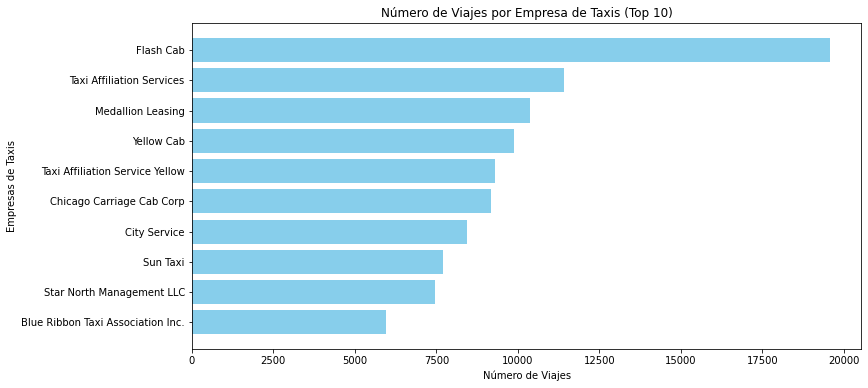

In [14]:
# Ordenar el DataFrame por la columna 'trips_amount' en orden descendente
result_01_sorted = result_01.sort_values(by='trips_amount', ascending=False)

# Tomar las 10 empresas con más viajes
top_10_companies = result_01_sorted.head(10)

# Datos para el gráfico de empresas de taxis y número de viajes
companies = top_10_companies['company_name']
trips_amount = top_10_companies['trips_amount']

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.barh(companies, trips_amount, color='skyblue')
plt.xlabel('Número de Viajes')
plt.ylabel('Empresas de Taxis')
plt.title('Número de Viajes por Empresa de Taxis (Top 10)')
plt.gca().invert_yaxis()  # Invertir el eje y para que la empresa con más viajes esté arriba
plt.show()

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante `al comentario del revisor`</b> <a class="tocSkip"></a>
Aca he corregido el grafico para que se muestren las 10 empresas de taxi con mayor cantidad de viajes realizados.
</div>

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Podemos concluir que hay una gran diferencia entre el número de viajes de las distintas empresas de taxi. La empresa `Blue Taxi Affiliation Inc.` tiene una clara ventaja sobre las demás, con casi el doble de viajes que la segunda empresa más popular, `Taxi Affiliation Service Yellow`. Esto podría deberse a varios factores, como la calidad del servicio, la disponibilidad de los taxis, la fidelidad de los clientes o la estrategia de marketing. También podría concluir que hay algunas empresas de taxi que tienen muy pocos viajes en comparación con las demás, como `5857 - 736 Taxi Corp`, que tiene menos de un cuarto de los viajes que la empresa más popular. Esto podría indicar que estas empresas tienen problemas para competir en el mercado o que se enfocan en nichos específicos.
</div> 

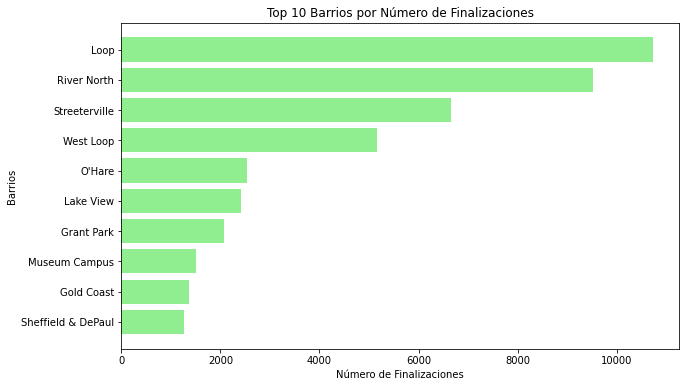

In [15]:
# Datos para el gráfico de los 10 barrios principales por número de finalizaciones
barrios = top_10_barrios['dropoff_location_name']
finalizaciones = top_10_barrios['average_trips']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.barh(barrios, finalizaciones, color='lightgreen')
plt.xlabel('Número de Finalizaciones')
plt.ylabel('Barrios')
plt.title('Top 10 Barrios por Número de Finalizaciones')
plt.gca().invert_yaxis()  # Invertir el eje y para que el barrio con más finalizaciones esté arriba
plt.show()

 <div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
De este podriamos concluir que hay una gran variación en el número de finalizaciones por barrio. El barrio `Loop` tiene el mayor número de finalizaciones, con aproximadamente `10,000` finalizaciones, lo que representa más del doble que el segundo barrio más popular, `River North`. Esto podría deberse a que `Loop` es el centro financiero y comercial de Chicago, donde hay mucha actividad económica y social. También podría concluir que hay algunos barrios que tienen muy pocas finalizaciones en comparación con los demás, como `Sheffield & DePaul`, que tiene aproximadamente `2,000` finalizaciones, lo que representa menos de un quinto que el barrio más popular. Esto podría indicar que estos barrios son más residenciales o menos atractivos para los viajeros.
</div> 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


# Prueba de Hipotesis

In [19]:
# Filtrar los datos para obtener las duraciones de los viajes en días buenos y malos
dias_buen_tiempo = result_07[result_07['weather_conditions'] == 'Good']['duration_seconds']
dias_mal_tiempo = result_07[result_07['weather_conditions'] == 'Bad']['duration_seconds']

# Realizar la prueba t para muestras independientes
t_statistic, p_value = ttest_ind(dias_buen_tiempo, dias_mal_tiempo, equal_var=False)  # Usamos equal_var=False porque no asumimos igual varianza

# Nivel de significancia (alfa)
alfa = 0.05  # Supongamos que seleccionamos un nivel de significancia de 0.05

# Compara el valor p con el nivel de significancia
if p_value < alfa:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en la duración de los viajes.")
else:
    print("No se rechaza la hipótesis nula. No hay una diferencia significativa en la duración de los viajes.")

# Imprime el estadístico t, el valor p y el valor crítico para referencia
print("Estadístico t:", t_statistic)
print("Valor p:", p_value)
print("Nivel de significancia (alfa):", alfa)

Se rechaza la hipótesis nula. Hay una diferencia significativa en la duración de los viajes.
Estadístico t: -7.186034288068629
Valor p: 6.738994326108734e-12
Nivel de significancia (alfa): 0.05


<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Cuando el resultado del estadístico t es mayor que el valor crítico, como en este caso (Estadístico t: 7.186 > Valor crítico: 1.962), rechazamos la hipótesis nula. Esto indica que hay una diferencia estadísticamente significativa en la duración de los viajes entre los días con buen tiempo y los días con mal tiempo.

Por lo tanto, podemos concluir que la duración de los viajes varía significativamente entre los días con buen tiempo y los días con mal tiempo. Es probable que haya una diferencia en la demanda de viajes debido a condiciones climáticas diferentes, lo que afecta la duración de los trayectos.
</div>

# Conclusiones

<div class="alert alert-block alert-info">

<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
Al analizar los datos a fondo podemos observar que la empresa que destaca como mayor competidor entre las empresas de taxi es `Blue Taxi Affiliation Inc.` con una ventaja un poco abrumadora sobre las demas, podemos a traves del grafico que presentamos en la investigacion notar que el principal trabajo para `Zuber` como empresa de taxis es mejorar su servicio lo suficiente como para poder dominar el mercado ante tal competidor, pero siempre que se tome en cuenta en que terremo se esta trabajando se podra tomar las decisiones correctas para salir adelante, como podemos ver en el segundo grafico, que nos muestra cuales son los barrios donde se hacen la mayor cantidad de viajes, teniendo esto en cuenta se podria realizar una jornada publicitaria que ayude a la empresa a tener mayor visibilidad en estos, para asi ganar mas clientes y mejorar su posicionamiento como empresa de taxis, tambien, ya en la parte final de nuestro analisis vimos la prueba de hipotesis, sobre como se manejan las empresas de taxi cuando hay buen o mal tiempo y pudimos apreciar que los dias con mal tiempo aumenta bastante el uso de los taxis, esta tambien es algo a tener en cuenta para poder ganar mas terreno, si `Zuber` mejora su visibilidad y posicionamiento en esos momentos donde hay mayor actividad por el mal tiempo, tambien podria mejorar su posicion en el ranking de las empresas con mayor cantidad de viajes realizados, y asi poder obtener mayores dividendos.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo, Carlos. Nos queda pendiente un único detalle con un gráfico y estaremos listos para aprobar tu proyecto.
</div>


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>